<a href="https://colab.research.google.com/github/benmellin/wildfire-prediction/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook, I clean records of wildfire data to be used as positive instances in machine learning.

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fire_df = pd.read_csv("/content/drive/MyDrive/ALDA Project/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv")

<ipython-input-54-75ad8c56483b>:1: DtypeWarning: Columns (5,11,12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  fire_df = pd.read_csv("/content/drive/MyDrive/ALDA Project/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv")


## Checking out the DF
- Used [this website](https://catalog.data.gov/dataset/national-usfs-fire-occurrence-point-feature-layer-d3233) to source data for fire ignitions
- Comes from the US Forest Service

In [ ]:
print(fire_df.shape)
print(fire_df.head())
print(fire_df.columns)

(582291, 35)
            X          Y   OBJECTID                                GLOBALID  \
0 -106.406890  36.288324  313655329  {02E94D62-D284-4760-819B-5DA7939C6A93}   
1 -107.243590  36.974714  313655330  {B180F8C6-F6DA-4F55-A2E3-F62E711C0633}   
2 -107.286090  36.586384  313655331  {BCD2E22D-471F-4A30-B2FF-9E33B68D59C6}   
3 -106.444690  36.543884  313655332  {68DB867D-BA27-4584-B5A8-8BBE7A46273B}   
4 -106.059347  36.281551  313655333  {B9AC5BE5-2198-4322-9D24-C6F3BFD4F790}   

  FIREOCCURID       CN                 REVDATE        FIRENAME COMPLEXNAME  \
0         NaN  1526571  2015/02/01 00:00:00+00   Blackies Mesa         NaN   
1         NaN  1523706  2015/02/01 00:00:00+00          3 Tree         NaN   
2         NaN  1525092  2015/02/01 00:00:00+00        Headache         NaN   
3         NaN  1526607  2015/02/01 00:00:00+00  Rito Del Medio         NaN   
4         NaN  1525366  2015/02/01 00:00:00+00        La Cueva         NaN   

   FIREYEAR  ...   LATDD83   LONGDD83 FIRET

In [ ]:
print(fire_df['DISCOVERYDATETIME'])

0         2014/07/03 00:00:00+00
1         2014/06/06 00:00:00+00
2         2014/07/28 00:00:00+00
3         2014/08/19 00:00:00+00
4         2014/08/26 00:00:00+00
                   ...          
582286    2005/09/11 00:00:00+00
582287    2010/04/08 00:00:00+00
582288    2009/09/29 00:00:00+00
582289    1996/07/06 00:00:00+00
582290    2021/07/14 00:15:02+00
Name: DISCOVERYDATETIME, Length: 582291, dtype: object


In [ ]:
print(fire_df["TOTALACRES"])

0              0.10
1              0.50
2              0.10
3              0.25
4              0.10
            ...    
582286         0.50
582287         0.10
582288         0.10
582289        10.00
582290    963309.00
Name: TOTALACRES, Length: 582291, dtype: float64


In [ ]:
print(fire_df["LATDD83"].min())
print(fire_df["LATDD83"].max())
print(fire_df["LONGDD83"].min())
print(fire_df["LONGDD83"].max())

-117.23305
438897.0
-1038467.0
1011212.77


- So the values for lattitude and longitude don't look great. Seems like there are probably some typos/misplaced decimals in this dataset.
- Longitude ranges from -180 to 180, lattitude ranges from -90 to 90.
- How many instances are there where the latitude or longitude is outside of the acceptable range for latitude?

In [ ]:
##Longitude

# Specify the range
lower_limit = -180
upper_limit = 180

# Count values outside the specified range
count_outside_range = ((fire_df['LONGDD83'] < lower_limit) | (fire_df['LONGDD83'] > upper_limit)).sum()
print(count_outside_range)


8


In [ ]:
##latitude

# Specify the range
lower_limit = -90
upper_limit = 90

# Count values outside the specified range
count_outside_range = ((fire_df["LATDD83"] < lower_limit) | (fire_df["LATDD83"] > upper_limit)).sum()
print(count_outside_range)


210


- Going to narrow the scope a bit. How many of these values are outside the range of the United States?
- Source of extreme points of US from here: http://www.cohp.org/extremes/extreme_points.html

### Checking to see how many points have lattitude and longitude that either doesn't exist or is outside of the United States
- I'd like to use Geopy's API or Google clouds API to return the country for every lattitude and longitude, but I would exceed the rate limits quickly for both.
- I think I would have to pay for both of these thigns
- Rather, I will just check and see if the latitude and longitude exist outside of the max and min of the united states. It is not perfect but it should help get rid of typos and stuff.
- Extreme points from here: https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States
- Also going to keep this to the contiguous United States here. Sorry Alaska and Hawaii!

In [ ]:
##Longitude

# Specify the range
lower_limit = -124.73004
upper_limit = -66.94975

# Count values outside the specified range
count_outside_range = ((fire_df['LONGDD83'] < lower_limit) | (fire_df['LONGDD83'] > upper_limit)).sum()
print(count_outside_range)


8512


In [ ]:

# Specify the range
lower_limit = 24.52
upper_limit = 49.38407

# Count values outside the specified range
count_outside_range = ((fire_df["LATDD83"] < lower_limit) | (fire_df["LATDD83"] > upper_limit)).sum()
print(count_outside_range)

4849


I will plan to drop these values during data cleaning

### Exploring the dates in the dataframe, making sure they are ok

In [ ]:
print(fire_df["DISCOVERYDATETIME"].str[:4])
years = fire_df["DISCOVERYDATETIME"].str[:4].astype(float)
print(min(years))


0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
582286    2005
582287    2010
582288    2009
582289    1996
582290    2021
Name: DISCOVERYDATETIME, Length: 582291, dtype: object
1001.0


In [ ]:
print(fire_df["DISCOVERYDATETIME"])

0         2014/07/03 00:00:00+00
1         2014/06/06 00:00:00+00
2         2014/07/28 00:00:00+00
3         2014/08/19 00:00:00+00
4         2014/08/26 00:00:00+00
                   ...          
582286    2005/09/11 00:00:00+00
582287    2010/04/08 00:00:00+00
582288    2009/09/29 00:00:00+00
582289    1996/07/06 00:00:00+00
582290    2021/07/14 00:15:02+00
Name: DISCOVERYDATETIME, Length: 582291, dtype: object


In [ ]:


# Convert the 'DISCOVERYDATETIME' to datetime and remove time portion
fire_df["DISCOVERYDATE"] = pd.to_datetime(fire_df["DISCOVERYDATETIME"], errors='coerce').dt.date

# Drop rows with invalid dates (NaT or incorrect format)
cleaned_fire_df = fire_df.dropna(subset=["DISCOVERYDATE"])

#  Filter dates between 1950 and 2024
cleaned_fire_df = cleaned_fire_df[(cleaned_fire_df["DISCOVERYDATE"] >= pd.to_datetime("1950-01-01").date()) &
                  (cleaned_fire_df["DISCOVERYDATE"] <= pd.to_datetime("2024-12-31").date())]

# Display the cleaned DataFrame
print(cleaned_fire_df[["DISCOVERYDATE"]].head())
print(cleaned_fire_df.shape)


  DISCOVERYDATE
0    2014-07-03
1    2014-06-06
2    2014-07-28
3    2014-08-19
4    2014-08-26
(528892, 36)


In [ ]:
print(cleaned_fire_df.shape)

(528892, 36)


## clean the latitude and longitude column

In [ ]:
# Define latitude limits
lower_limit = 24.52
upper_limit = 49.38407

# Filter the dataframe to keep only rows within the valid latitude range
lat_clean_fire_df = cleaned_fire_df[(cleaned_fire_df["LATDD83"] >= lower_limit) & (cleaned_fire_df["LATDD83"] <= upper_limit)]

# Display the first few rows of the cleaned dataframe
print(lat_clean_fire_df[["LATDD83"]].head())


    LATDD83
0  36.28832
1  36.97471
2  36.58638
3  36.54388
4  36.28155


In [ ]:
# Define long limits
lower_limit = -124.73004
upper_limit = -66.94975

# Filter the dataframe to keep only rows within the valid latitude range
latlong_clean_fire_df = lat_clean_fire_df[(lat_clean_fire_df['LONGDD83'] >= lower_limit) & (lat_clean_fire_df['LONGDD83'] <= upper_limit)]

# Display the first few rows of the cleaned dataframe
print(latlong_clean_fire_df[['LONGDD83']].head())


    LONGDD83
0 -106.40689
1 -107.24359
2 -107.28609
3 -106.44469
4 -106.05935


### Test to make sure it worked

In [ ]:
##Longitude

# Specify the range
lower_limit = -124.73004
upper_limit = -66.94975

# Count values outside the specified range
count_outside_range = ((latlong_clean_fire_df['LONGDD83'] < lower_limit) | (latlong_clean_fire_df['LONGDD83'] > upper_limit)).sum()
print(count_outside_range)


0


In [ ]:
# latitude
# Specify the range
lower_limit = 24.52
upper_limit = 49.38407

# Count values outside the specified range
count_outside_range = ((latlong_clean_fire_df["LATDD83"] < lower_limit) | (latlong_clean_fire_df["LATDD83"] > upper_limit)).sum()
print(count_outside_range)

0


In [ ]:
print(latlong_clean_fire_df.shape)

(519891, 36)


## Cleaning acres column

In [ ]:
# Convert to numeric (in case there are non-numeric values)
acres_clean_df = latlong_clean_fire_df.copy()
acres_clean_df["TOTALACRES"] = pd.to_numeric(acres_clean_df["TOTALACRES"], errors="coerce")

# Drop rows where ACRES is NaN
acres_clean_df = acres_clean_df.dropna(subset=["TOTALACRES"])

# Remove non-positive values (acres should be > 0)
acres_clean_df = acres_clean_df[acres_clean_df["TOTALACRES"] > 0]

# upper_threshold = 1_000_000
# fire_df = fire_df[fire_df["TOTALACRES"] <= upper_threshold]

# Display the first few rows
print(acres_clean_df.shape)


(516892, 36)


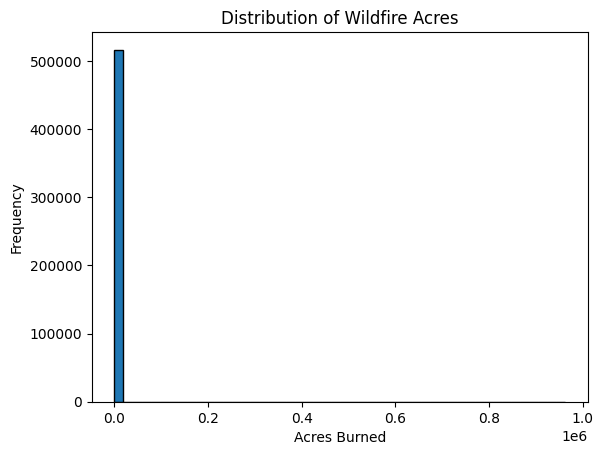

In [ ]:
# View histogram of acreage

plt.hist(acres_clean_df["TOTALACRES"], bins=50, edgecolor="black")

# Labels and title
plt.xlabel("Acres Burned")
plt.ylabel("Frequency")
plt.title("Distribution of Wildfire Acres")

# Show plot
plt.show()

In [ ]:
print(acres_clean_df["TOTALACRES"].max())

963309.0


In [ ]:
max_acres = acres_clean_df["TOTALACRES"].idxmax()
print(acres_clean_df.loc[max_acres])

X                                                          -121.378833
Y                                                               39.876
OBJECTID                                                     314239365
GLOBALID                        {4BCBFB26-835E-4620-A4B4-0182BB41C5A3}
FIREOCCURID                       E9DB628D-DFB7-4C85-BCD6-1254574D946B
CN                                                                 NaN
REVDATE                                         2021/12/20 09:22:24+00
FIRENAME                                                         DIXIE
COMPLEXNAME                                                        NaN
FIREYEAR                                                        2021.0
UNIQFIREID                                           2021-CABTU-009205
SOFIRENUM                                                          NaN
LOCALFIRENUM                                                       NaN
SECURITYID                                                         5.0
DISCOV

This wasn't a typo--the dixie fire actually existed and was massive.

In [ ]:
## Save dataframe
final_clean_df= acres_clean_df[["TOTALACRES",'LONGDD83',"LATDD83",'DISCOVERYDATETIME']]
print(final_clean_df.shape)
final_clean_df.to_csv("/content/drive/MyDrive/ALDA Project/clean_dates_and_locs.csv", index=False)

(516892, 4)
